# CSC 4220 Group Project 

# Load The Data

## Import Libraries

We import the functions used to analize the data.

This is important because we need these equations, but writing the equations personaly could lead to errors in our analysis. It is best to rely on the tested and peer-reviewed equations.

In [1]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

2023-04-22 16:55:02.847011: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'scikeras'

## Load Dataset

We load the dataset from its source. 

This allows us to run our equations on the data found in the dataset, and to find patterns and make predictions on the data.

In [5]:
dataset = read_csv("train.csv")
valadationdata = read_csv("test.csv")

# Summarize the Dataset
in this step we are going to take a lok at the data in a few dirrerent ways:

  1. dimensions of the dataset - the number of rows(instances) and columns(attributes)
  2. Peek at the data itself. - look at the data type for each attribute
  3. Statistical summary of all attributes. - the count mean, standard deviation, minimum, percentiles, and maximum
  4. Breakdown of the data by the class variable. - the data broken down by the catagorical variable (class) discrete variable

## Dimensions of the Dataset

In [6]:
dataset.shape

(17996, 17)

## Peek at the Data

In [7]:
dataset.head(20)

Artist Name                             Track Name  \
0                     Bruno Mars  That's What I Like (feat. Gucci Mane)   
1                         Boston                           Hitch a Ride   
2                  The Raincoats                     No Side to Fall In   
3                           Deno             Lingo (feat. J.I & Chunkz)   
4          Red Hot Chili Peppers      Nobody Weird Like Me - Remastered   
5                    The Stooges      Search and Destroy - Iggy Pop Mix   
6                  Solomon Burke                    None Of Us Are Free   
7                   Randy Travis                      On the Other Hand   
8      Professional Murder Music                                   Slow   
9                    Dudu Aharon        ◊ì◊ï◊ì◊ï, ◊ô◊ê◊ú◊ú◊î ◊ô◊ê◊ú◊ú◊î   
10                 Mohammed Rafi                   Meri Dosti Mera Pyar   
11                Arctic Monkeys            The View From The Afternoon   
12                    Eyal Golan                    ◊ß◊®◊ï◊ë◊î ◊ê◊ú◊ô◊ô   
13  Harald Lassen, Bram de Looze                     How it feels pt. 2   
14           Buffalo Springfield                    For What It's Worth   
15                  Elmore James                          Madison Blues   
16                   Dudu Aharon           ◊ú◊ê ◊ô◊õ◊ï◊ú ◊ë◊ú◊¢◊ì◊ô◊ô◊ö   
17            Velvet Two Stripes                                 Drinks   
18                Eden Ben Zaken                           ◊û◊†◊í◊ô◊†◊î   
19                        DaBaby             Baby Sitter (feat. Offset)   

    Popularity  danceability  energy   key  loudness  mode  speechiness  \
0         60.0         0.854   0.564   1.0    -4.964     1       0.0485   
1         54.0         0.382   0.814   3.0    -7.230     1       0.0406   
2         35.0         0.434   0.614   6.0    -8.334     1       0.0525   
3         66.0         0.853   0.597  10.0    -6.528     0       0.0555   
4         53.0         0.167   0.975   2.0    -4.279     1       0.2160   
5         53.0         0.235   0.977   6.0     0.878     1       0.1070   
6         48.0         0.674   0.658   5.0    -9.647     0       0.1040   
7         55.0         0.657   0.415   5.0    -9.915     1       0.0250   
8         29.0         0.431   0.776  10.0    -5.403     1       0.0527   
9         14.0         0.716   0.885   1.0    -4.348     0       0.0333   
10        11.0         0.491   0.563   7.0    -8.588     0       0.0331   
11        59.0         0.387   0.922   9.0    -5.192     0       0.0674   
12        34.0         0.585   0.381   1.0    -7.622     0       0.0463   
13        34.0         0.462   0.374  11.0   -12.069     0       0.0331   
14        76.0         0.653   0.519   2.0   -10.164     1       0.0497   
15        37.0         0.431   0.852   2.0    -6.522     1       0.0431   
16        14.0         0.713   0.939   5.0    -3.609     0       0.0372   
17        31.0         0.564   0.801   1.0    -4.730     0       0.0473   
18        29.0         0.570   0.458   9.0    -5.935     0       0.0236   
19        70.0         0.852   0.730   1.0    -5.803     1       0.0579   

    acousticness  instrumentalness  liveness  valence    tempo  \
0       0.017100               NaN    0.0849   0.8990  134.071   
1       0.001100          0.004010    0.1010   0.5690  116.454   
2       0.486000          0.000196    0.3940   0.7870  147.681   
3       0.021200               NaN    0.1220   0.5690  107.033   
4       0.000169          0.016100    0.1720   0.0918  199.060   
5       0.003530          0.006040    0.1720   0.2410  152.952   
6       0.404000          0.000001    0.0981   0.6770  143.292   
7       0.175000          0.000006    0.1320   0.3470   96.030   
8       0.000022          0.001300    0.1790   0.3180  120.857   
9       0.061400               NaN    0.2530   0.8330  128.043   
10      0.957000          0.002300    0.2630   0.8430   95.558   
11      0.004870               NaN    0.1870   0.4170  146.478   
12      0.4

## Statistical Summary

Descriptions summary count, mean, standard deviation, min, max as well as some precentiles

In [8]:
#descriptions
dataset.describe()

Popularity  danceability        energy           key      loudness  \
count  17568.000000  17996.000000  17996.000000  15982.000000  17996.000000   
mean      44.512124      0.543433      0.662777      5.952447     -7.910660   
std       17.426928      0.166268      0.235373      3.196854      4.049151   
min        1.000000      0.059600      0.000020      1.000000    -39.952000   
25%       33.000000      0.432000      0.509000      3.000000     -9.538000   
50%       44.000000      0.545000      0.700000      6.000000     -7.016000   
75%       56.000000      0.659000      0.860000      9.000000     -5.189000   
max      100.000000      0.989000      1.000000     11.000000      1.355000   

               mode   speechiness  acousticness  instrumentalness  \
count  17996.000000  17996.000000  17996.000000      13619.000000   
mean       0.636753      0.079707      0.247082          0.177562   
std        0.480949      0.083576      0.310632          0.304048   
min        0.000000      0.022500      0.000000          0.000001   
25%        0.000000      0.034800      0.004300          0.000089   
50%        1.000000      0.047400      0.081400          0.003910   
75%        1.000000      0.083000      0.434000          0.200000   
max        1.000000      0.955000      0.996000          0.996000   

           liveness       valence         tempo  duration_in min/ms  \
count  17996.000000  17996.000000  17996.000000        1.799600e+04   
mean       0.196170      0.486208    122.623294        2.007445e+05   
std        0.159212      0.240195     29.571527        1.119891e+05   
min        0.011900      0.018300     30.557000        5.016500e-01   
25%        0.097500      0.297000     99.620750        1.663370e+05   
50%        0.129000      0.481000    120.065500        2.091600e+05   
75%        0.258000      0.672000    141.969250        2.524900e+05   
max        1.000000      0.986000    217.416000        1.477187e+06   

       time_signature         Class  
count    17996.000000  17996.000000  
mean         3.924039      6.695821  
std          0.361618      3.206073  
min          1.000000      0.000000  
25%          4.000000      5.000000  
50%          4.000000      8.000000  
75%          4.000000     10.000000  
max          5.000000     10.000000

## Class Distribution

Take a look at the rows that belong to each class - look at break down of catagorical variables.

In [9]:
dataset.groupby('Class').size()

Class
0      625
1     1373
2     1272
3      402
4      387
5     1447
6     2587
7      576
8     1854
9     2524
10    4949
dtype: int64

# Data Visualization

 1. Univarate plots to better understand each attribute
 2. Multivariate plots to better understand the relationships between attributes

## Univariate Plots

Plots of each individual variable to view the distribution given that the input variables are numeric

1. box and wisker plots
2. histograms

### Box Plots

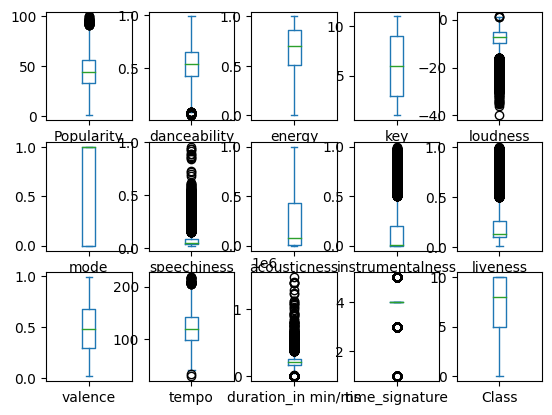

In [10]:
dataset.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
pyplot.rcParams['figure.figsize'] = (18, 9)
pyplot.show()

### Histograms

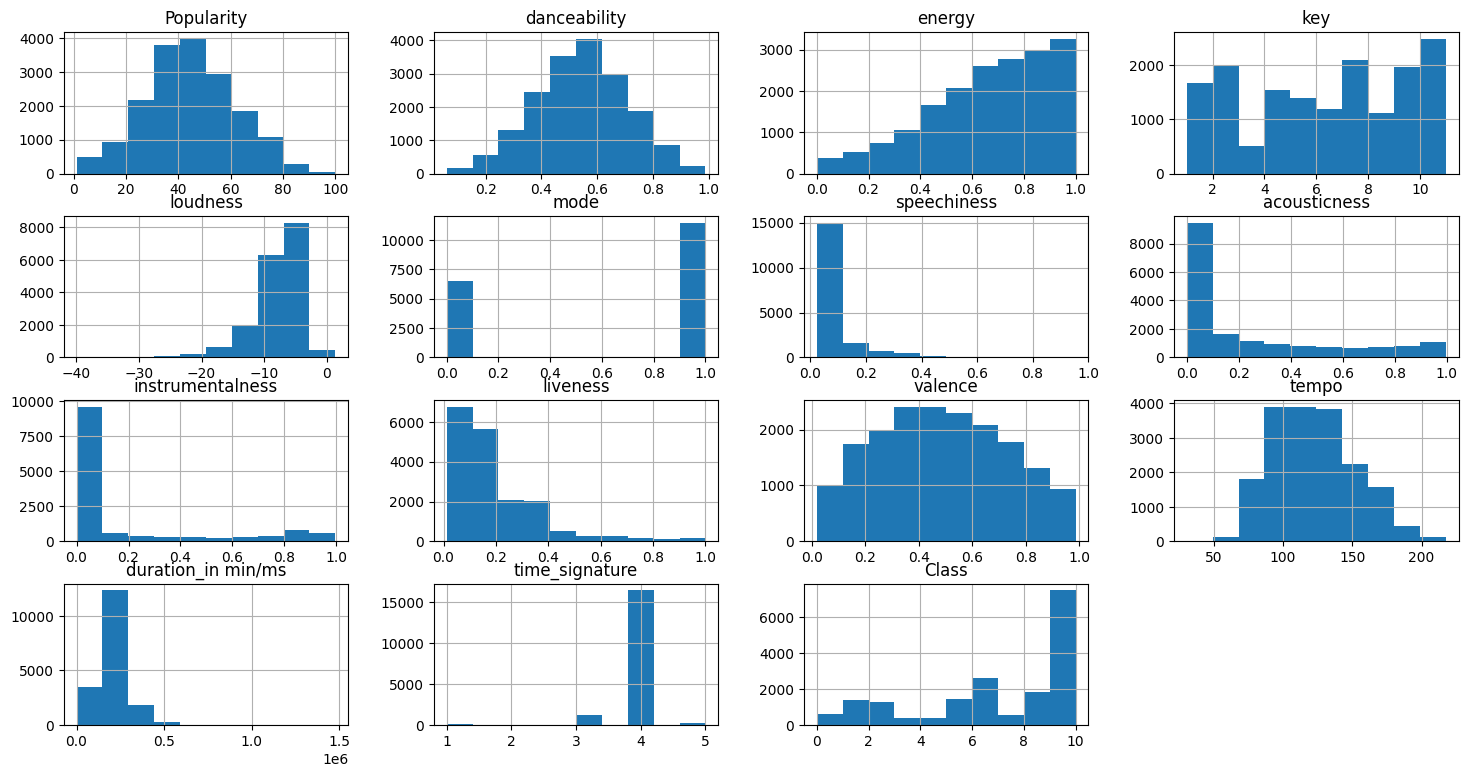

In [11]:
dataset.hist()
pyplot.show()

## Multivariate Plots

to show the interactions between the variables

1. Scaterplots - Diagonal Grouping of some pairs of attributes suggests a high correlation and a predictable relationship.

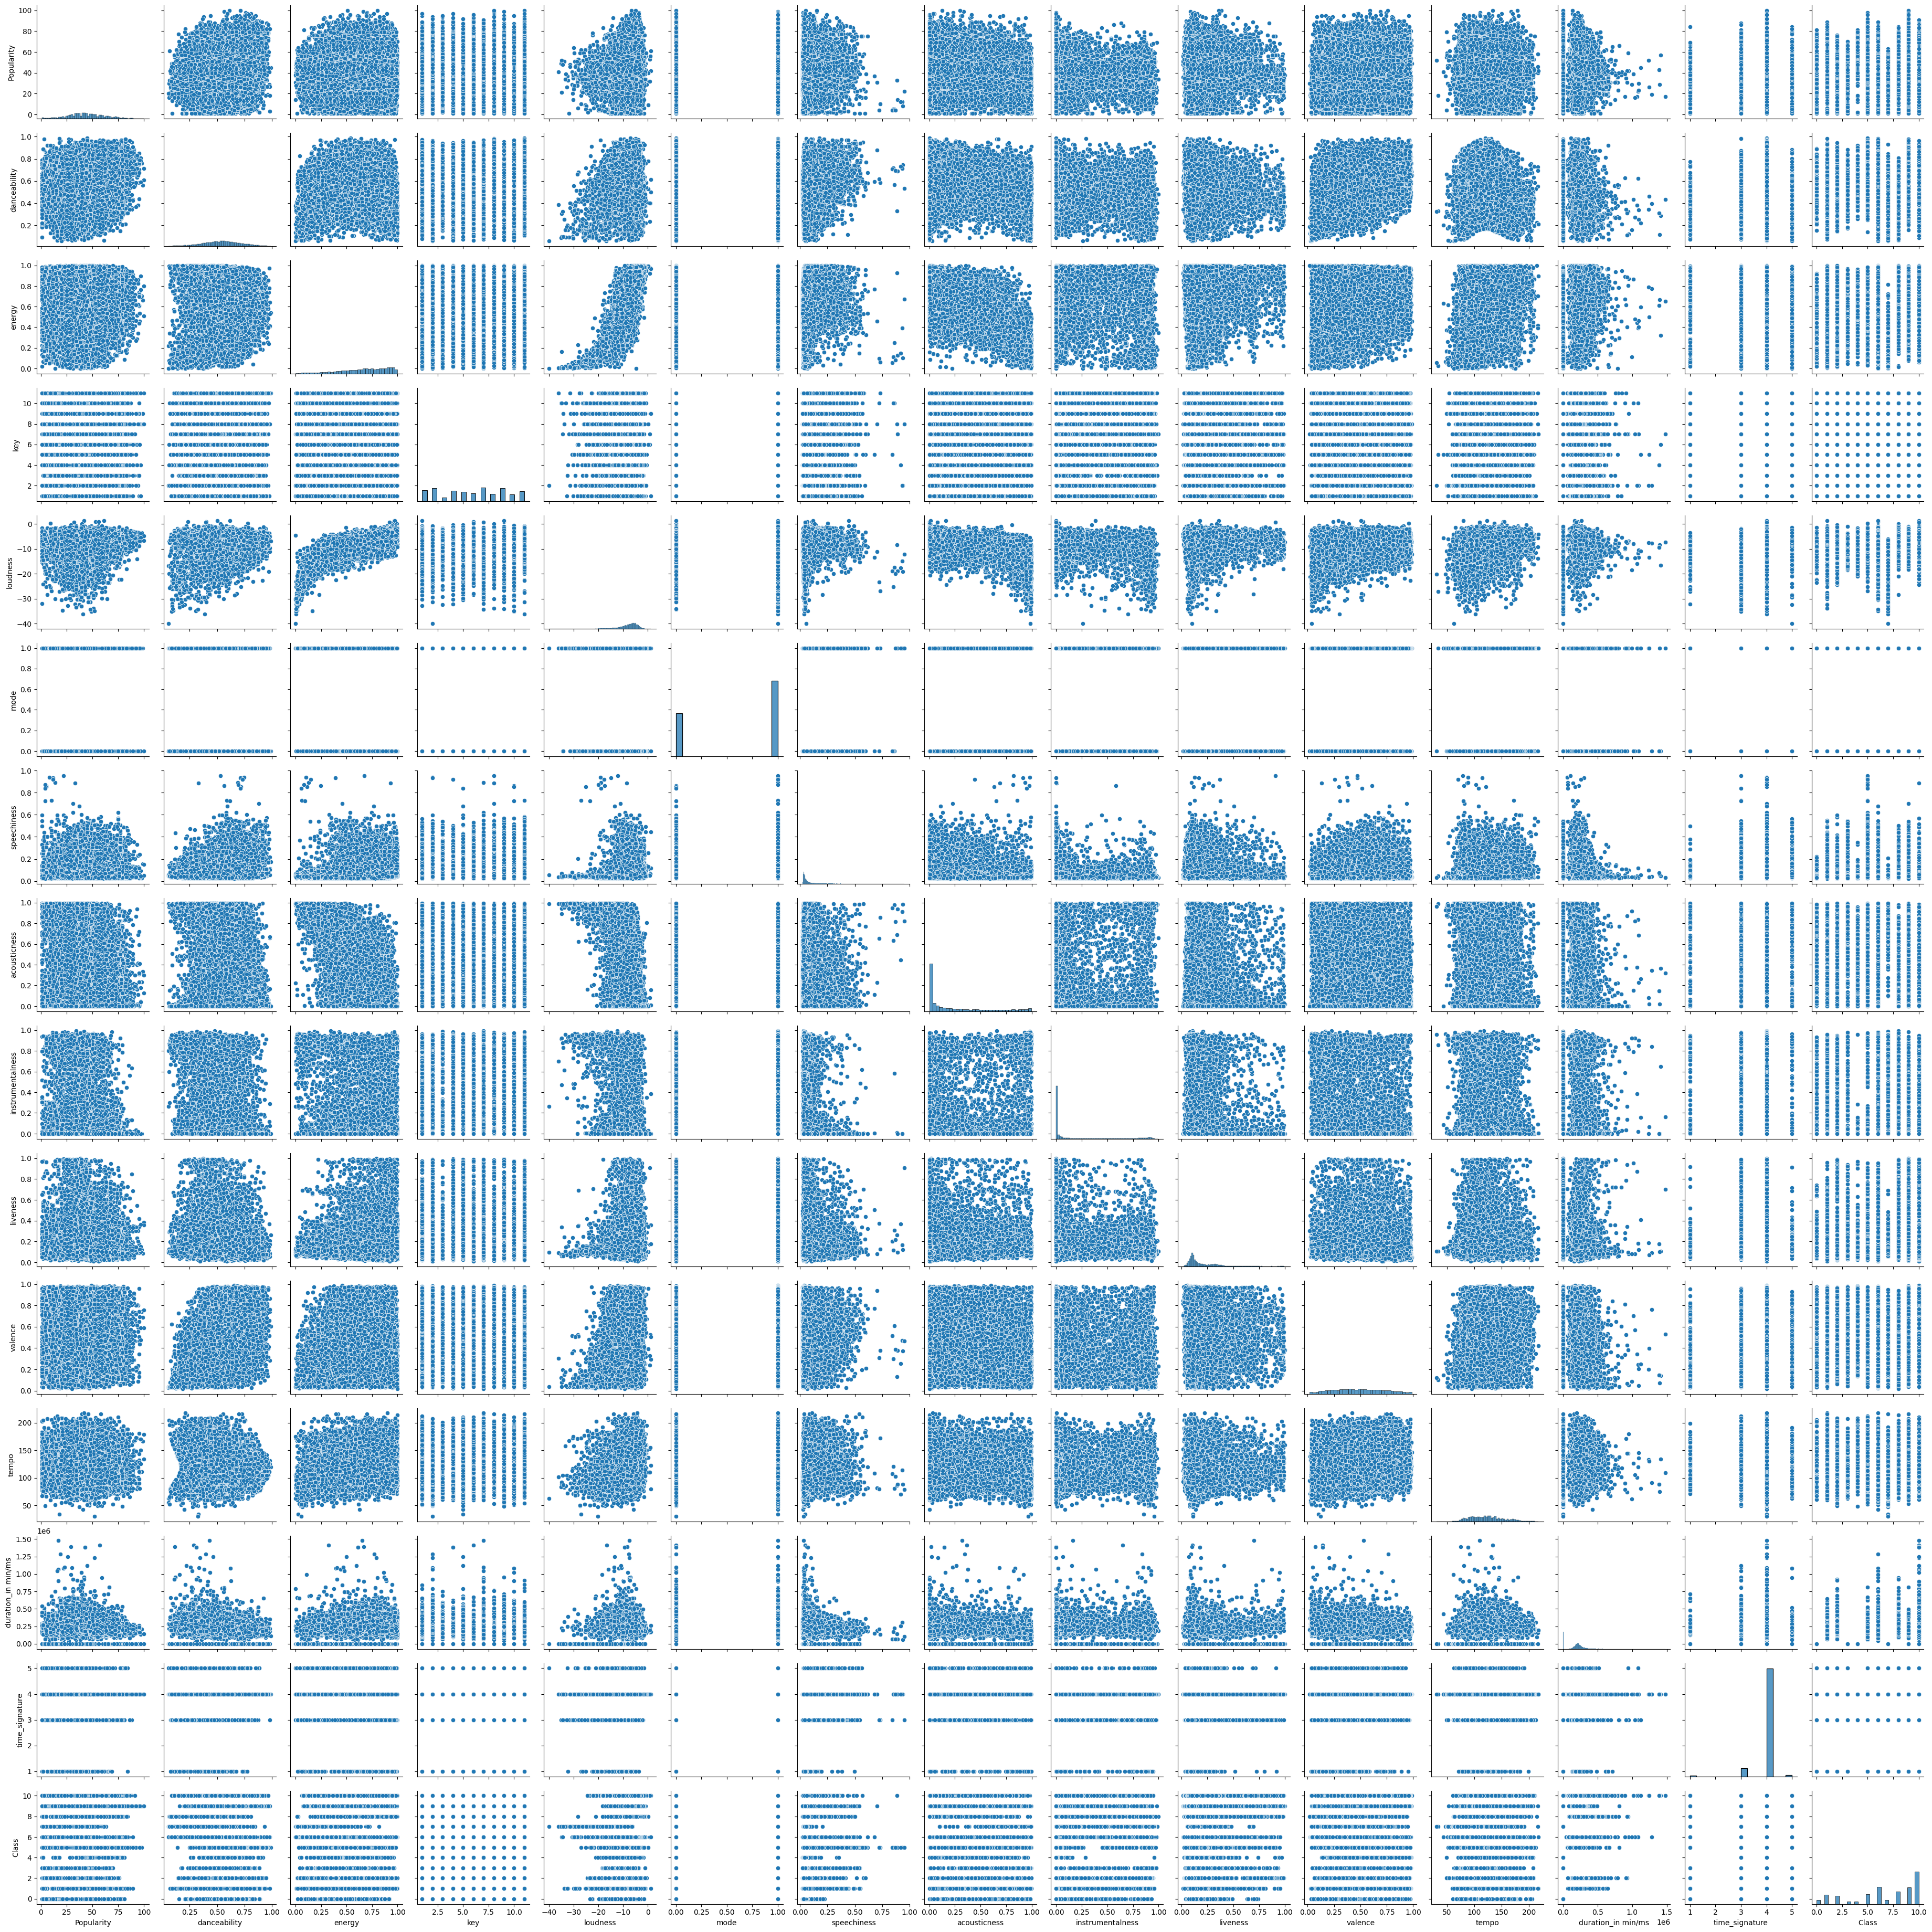

In [12]:
sns.pairplot(dataset)
pyplot.show()

A Correlation Matrix for the Data

<ipython-input-13-9d3fd451b567>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

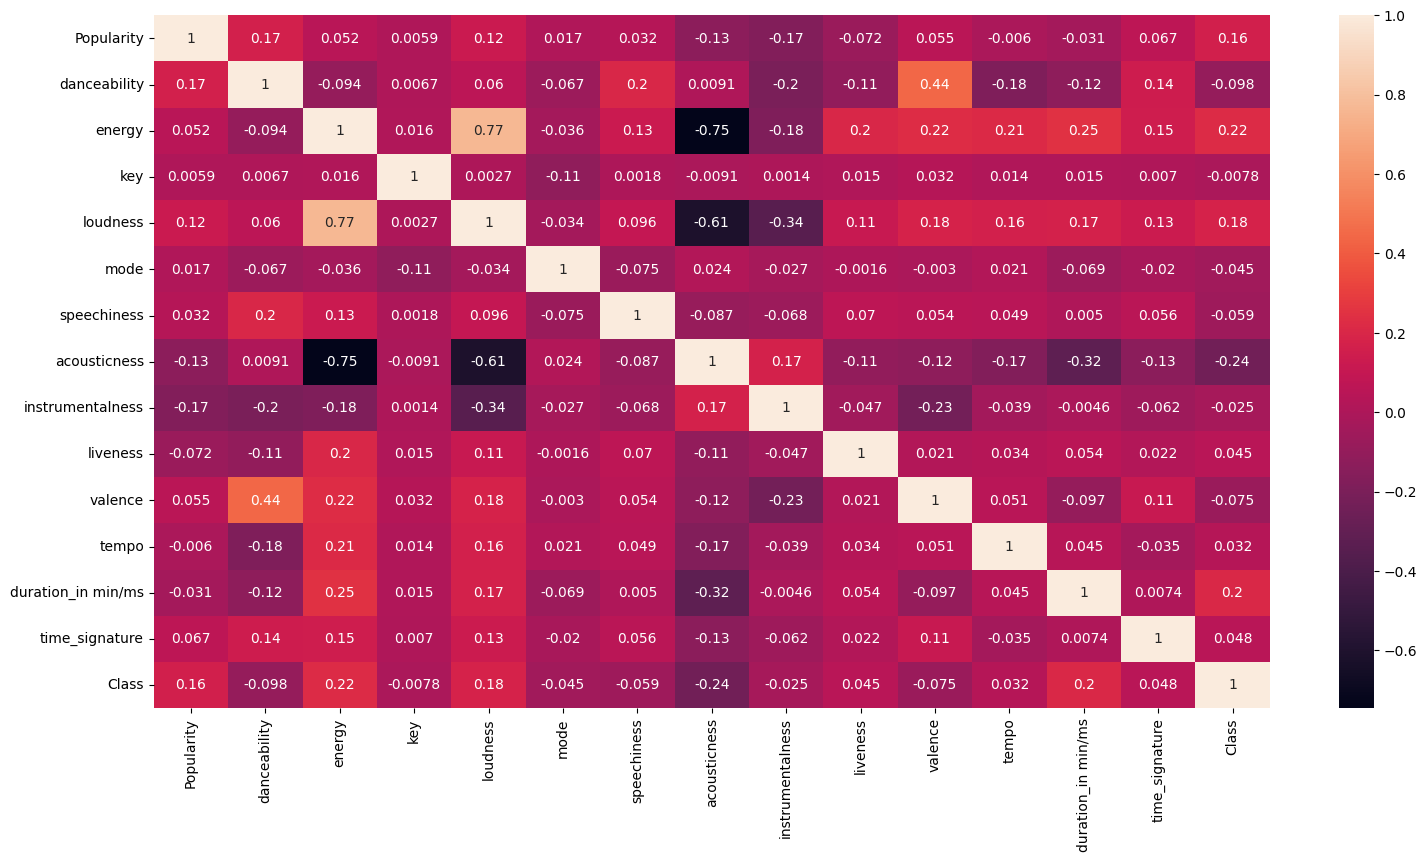

In [13]:
sns.heatmap(dataset.corr(),annot=True)

# Evaluate Some Algorithms

Now it is time to creat some models of the dat and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

  1. Seperate out a validation sataset.
  2. Set-up the test harness to use 10-fold cross validation
  3. Build multiple different models to predict species from flower measurements
  4. Select the best model.

## Create a Validation Dataset

we need to know that the model we created is good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete setimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are goin to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded data set into two, 80% of which we will use to train, evaluate and select among out models, and 20% that we will hold back as a validation dataset.

In [14]:
dataset = dataset.drop(["Artist Name","Track Name"],axis=1)
dataset = dataset.dropna(how = "any")

### Split-out validation dataset

In [15]:
dataset['Class'].unique()

array([10,  6,  2,  4,  8,  3,  7,  9,  1,  5,  0])

In [16]:

array = dataset.values
X = array[:,0:14]
y = array[:,14]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
Y_Cat_train = tf.keras.utils.to_categorical(Y_train, num_classes=11, dtype="int")
Y_Cat_validation = tf.keras.utils.to_categorical(Y_validation, num_classes=11, dtype="int")

You now have training data in the *X_train* and *Y_train* for preparing models and a *x_validation* and *Y_validation* sets that we can use later.



## Test Harness

We will use stratified 10-fold cross validation to estimate model accuracy. 

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

stratified means that each fold or split of teh dataset will aim to have the same distribution of example by class as exist in the whole training dataset.

We set the random seed via the *random_state* argument to a ficed number to ensure that each algorithm is evaluated on the same splits of the training dataset.

We are usiong the metric of '*accuracy*' to evaluate models.

This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage. We will be using the *scoring* variable when we run build and evaluate each model next.


## Build Models

We get and idea from the plots that some of the classes are martially linearly seperable in some dimensions, so we are expecting benerally good results.

Let's test ^ different Algorithms:

  1. Logistic Regression (LR)
  2. Linear Discriminant Analysis (LDA)
  3. K-Nearest Neighbors (KNN)
  4. Classification and REgerssion Trees (CART) 
  5. Gaussian Naive Bayes (NB)
  6. Support Vector Machines (SVM)
  7. Deep Neural Network (DNN)

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, Cart, NB and SVM) algorithms, and a Neural Network.

In [17]:
# define the model
def tuned_model(neurons,layers,act_h,act_o, dropout_rate, act):
  # create model
  model = Sequential()
  model.add(Dense(neurons, input_dim=14, kernel_initializer='normal', activation=act_h))
  model.add(Dropout(dropout_rate))
  if layers >= 2: 
    model.add(Dense(neurons, kernel_initializer='normal', activation=act))
  if layers >= 3: 
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, kernel_initializer='normal', activation=act))
  if layers >= 4:
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, kernel_initializer='normal', activation=act))
  model.add(Dense(11, kernel_initializer='normal',activation=act_o))
  # Compile model
  model.compile(loss='categorical_crossentropy', metrics = "accuracy")
  return model

In [18]:
checkpoint_name = 'Weights\checkpoint.hdf5' 
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_weights_only = True, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

##  Step-3: Train Your Model:

In [19]:
classifier = KerasClassifier(model=tuned_model,neurons = 1,layers = 2,act_h = "relu",act_o = "softmax",dropout_rate = 0.0,act = "sigmoid",callbacks=callbacks_list,epochs=250, batch_size=200, verbose=0)

In [20]:
neurons = [128, 256]
layers = [2,3,4]
dropout_rate = [0.0, 0.2]
act = ['relu', 'sigmoid']
act_h = ["relu", 'sigmoid']
act_o = ['softmax', 'sigmoid']

param_grid = dict(neurons=neurons, layers=layers,dropout_rate=dropout_rate, act=act, act_h = act_h, act_o = act_o)
grid = RandomizedSearchCV(estimator=classifier, param_distributions = param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_Cat_train,validation_data=(X_validation, Y_Cat_validation))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/scikeras/wrappers.py", line 762, in fit
    self._fit(
  File "/usr/local/lib/python3.9/dist-packages/scikeras/wrapper


Epoch 1: val_loss improved from inf to 1.88606, saving model to Weights\checkpoint.hdf5

Epoch 2: val_loss improved from 1.88606 to 1.87725, saving model to Weights\checkpoint.hdf5

Epoch 3: val_loss improved from 1.87725 to 1.82921, saving model to Weights\checkpoint.hdf5

Epoch 4: val_loss improved from 1.82921 to 1.82145, saving model to Weights\checkpoint.hdf5

Epoch 5: val_loss improved from 1.82145 to 1.81228, saving model to Weights\checkpoint.hdf5

Epoch 6: val_loss did not improve from 1.81228

Epoch 7: val_loss improved from 1.81228 to 1.79803, saving model to Weights\checkpoint.hdf5

Epoch 8: val_loss did not improve from 1.79803

Epoch 9: val_loss improved from 1.79803 to 1.78054, saving model to Weights\checkpoint.hdf5

Epoch 10: val_loss improved from 1.78054 to 1.77748, saving model to Weights\checkpoint.hdf5

Epoch 11: val_loss did not improve from 1.77748

Epoch 12: val_loss improved from 1.77748 to 1.76837, saving model to Weights\checkpoint.hdf5

Epoch 13: val_loss 

In [24]:
print("DNN: Best: {c} using {d}".format(c= grid_result.best_score_, d= grid_result.best_params_))
DNN = tuned_model(256,4,'relu','sigmoid', 0.2, 'sigmoid')
DNN.load_weights('Weights\checkpoint.hdf5')
DNN.summary()

DNN: Best: 0.36507936507936506 using {'neurons': 256, 'layers': 4, 'dropout_rate': 0.2, 'act_o': 'sigmoid', 'act_h': 'relu', 'act': 'sigmoid'}
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               3840      
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 dropout_11 (Dropout)        (None, 256)   

In [26]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
print("DNN: Best: {c} using {d}".format( c= grid_result.best_score_, d= grid_result.best_params_))

LR: 0.328783 (0.005580)
LDA: 0.473016 (0.013618)
KNN: 0.234286 (0.008455)
CART: 0.344339 (0.011340)
NB: 0.350265 (0.012093)
SVM: 0.260317 (0.007947)
DNN: Best: 0.36507936507936506 using {'neurons': 256, 'layers': 4, 'dropout_rate': 0.2, 'act_o': 'sigmoid', 'act_h': 'relu', 'act': 'sigmoid'}


## Select Best Model

We now have 6 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate. 

In this Case, we can see that it looks like Linear Discriminant Analysis (LDA) has the largest estimated accuracy score at about 0.47 or 47%

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a poplation of accuracy measures for each algorithm. because each algorithm was evaluated 10 times.

A uesful way to compare the samples of results for each algorithm is to create a box and whisker plot for each distribution and compare the distributions.

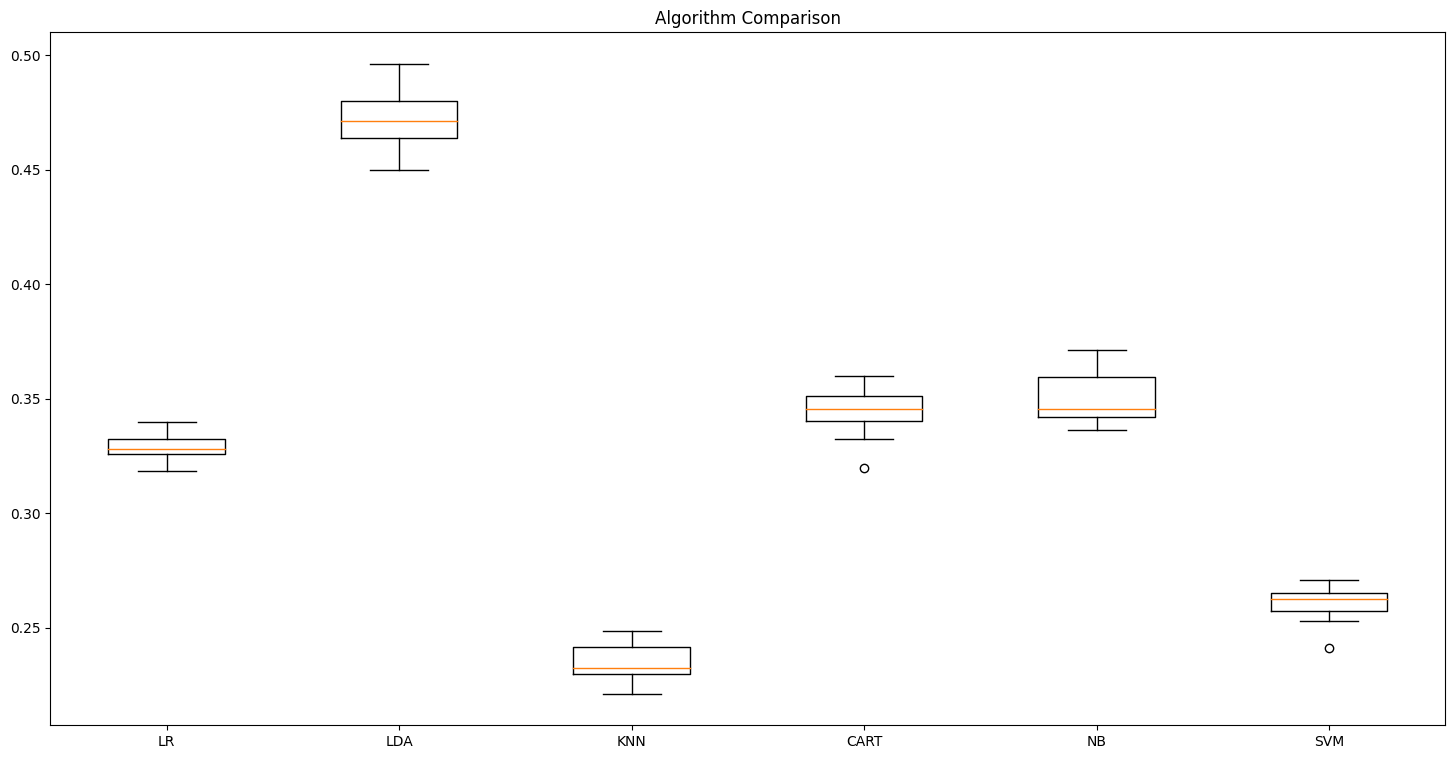

In [27]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

We can see that the box and whisker plots are squashed at the top of the range with many evaluations achieving 30% accuracy, and some pushing down into the high 50% accuracies.

# Make Predictions

We must choose and algorithm to use to make predictions.

The results in the previous section suggest that the LDA was perhaps the most accurate model. We will use this model as our final model.

Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable ot keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both of these issues will result in an overly optimistic result.


## Make Predictions

We can fit the model on the entire training dataset and make predictions on the validation dataset.

In [28]:
model =  LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

## Evaluate Predictions

We can evaluate the predictions by comparing them to the expected results in the validation set, then calculate classification accuracy, as well as a confusion matrix and a classification report.

In [29]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.4633939906898011
[[ 72   0   0   5   6   0   0   4   0   1   0]
 [  0   0  10   0   0  10  46   6  12  12 119]
 [  0   0  68   1   0   1  21   0   4   8  89]
 [ 13   0   0  37   2   0   0   3   0   0   0]
 [ 13   0   0   2  16   0   0   0   0   0   1]
 [  0   0   7   1   0  49   8   0   3  23  14]
 [  0   0  24   3   0  26 104   8  26  32 159]
 [  6   0   0   2   1   0   0  79   0   0   0]
 [  0   0   0   0   0   1  19   1 167   1 134]
 [  9   0  19   1   8  15  20   0   2  62  74]
 [  3   0  35   3  19   9  58   1  76  28 441]]
              precision    recall  f1-score   support

         0.0       0.62      0.82      0.71        88
         1.0       0.00      0.00      0.00       215
         2.0       0.42      0.35      0.38       192
         3.0       0.67      0.67      0.67        55
         4.0       0.31      0.50      0.38        32
         5.0       0.44      0.47      0.45       105
         6.0       0.38      0.27      0.32       382
         7.0       0.77      0

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can see that the accuracy is .46 or about 46% on the hold out data set.

The confusion matrix provides and indication of te errors made.

Finally, the classification report provides a breakdown of each class by precision, recal, f1-score and support showing excllent results (granted the validation dataset was small)